# Visualize and Analyze the data

In [1]:
import os
os.chdir('../saliency_model/')

import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import pandas as pd
import seaborn as sns
from glob import glob

In [2]:
os.chdir('../results/')
glob('*.p')

['19-02-01_results_face_05.p',
 '19-02-01_results_plain_models.p',
 '19-02-01_results_face_03.p',
 '19-02-01_results_over_baseline_faces_07.p',
 '19-02-01_results_face_07.p',
 '19-01-31_results.p',
 '19-02-01_results_over_baseline_faces_05.p',
 '19-02-01_results_over_baseline_faces_03.p']

## Load all of the data

In [3]:
# (summary, context, model) = pickle.load(open( "19-01-31_results.p", "rb"))

In [4]:
(summary, context, model, metric) = pickle.load(open( '19-02-01_results_plain_models.p', "rb"))

In [5]:
print(np.shape(summary))
print(context)
print(model)
print(metric)

(6, 9, 4)
['all', 'person', 'no person', 'animal', 'electronic', 'sports']
['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun', 'dg', 'faces']
['nss', 'sim', 'ig', 'auc']


In [6]:
(summary_f03, context_f03, model_f03, metric_f03) = pickle.load(open( '19-02-01_results_face_03.p', "rb"))
(summary_f05, context_f05, model_f05, metric_f05) = pickle.load(open( '19-02-01_results_face_05.p', "rb"))
(summary_f07, context_f07, model_f07, metric_f07) = pickle.load(open( '19-02-01_results_face_07.p', "rb"))


In [7]:
(summary_ob_f07, context_ob_f07, model_ob_f07, metric_ob_f07) = pickle.load(open( '19-02-01_results_over_baseline_faces_07.p', "rb"))
(summary_ob_f05, context_ob_f05, model_ob_f05, metric_ob_f05) = pickle.load(open( '19-02-01_results_over_baseline_faces_05.p', "rb"))
(summary_ob_f03, context_ob_f03, model_ob_f03, metric_ob_f03) = pickle.load(open( '19-02-01_results_over_baseline_faces_03.p', "rb"))

## Get the IG scores

In [8]:
ig_table = summary[:,:,2]
ig_f03_table = summary_f03[:,:,2]
ig_f05_table = summary_f05[:,:,2]
ig_f07_table = summary_f07[:,:,2]

In [9]:
ig_ob_f03_table = summary_ob_f03[0][:,:,2]
ig_ob_f05_table = summary_ob_f05[0][:,:,2]
ig_ob_f07_table = summary_ob_f07[0][:,:,2]

## Change scores into DataFrames

In [10]:
IG = pd.DataFrame(data=ig_table, columns=model, index=context)
IG.columns.name='models'
IG.index.name='context'

IG = IG.transpose()
faces = IG.loc['faces']
dg = IG.loc['dg']
IG = IG.loc[['aim','cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']]

IG

context,all,person,no person,animal,electronic,sports
models,,,,,,
aim,3.601486,3.507835,3.753299,3.815986,4.324051,2.754290
cas,4.042589,3.957036,4.181276,4.193363,4.651863,3.887734
covsal,2.988373,2.990500,2.984926,2.751369,3.440113,2.878326
gbvs,4.389129,4.261897,4.595379,4.601708,4.949470,4.191043
icf,3.967415,3.761353,4.301451,4.290669,4.631382,3.111732
ik,3.782932,3.630731,4.029657,3.795496,4.468836,3.324104
sun,3.689604,3.501879,3.993918,3.997621,4.343237,3.224621


In [11]:
IG['mean context'] = IG.mean(axis=1)
IG = IG.transpose()
IG['mean model'] = IG.mean(axis=1)
IG = IG.transpose()
IG

context,all,person,no person,animal,electronic,sports,mean context
models,,,,,,,
aim,3.601486,3.507835,3.753299,3.815986,4.324051,2.754290,3.626158
cas,4.042589,3.957036,4.181276,4.193363,4.651863,3.887734,4.152310
covsal,2.988373,2.990500,2.984926,2.751369,3.440113,2.878326,3.005601
gbvs,4.389129,4.261897,4.595379,4.601708,4.949470,4.191043,4.498104
icf,3.967415,3.761353,4.301451,4.290669,4.631382,3.111732,4.010667
ik,3.782932,3.630731,4.029657,3.795496,4.468836,3.324104,3.838626
sun,3.689604,3.501879,3.993918,3.997621,4.343237,3.224621,3.791813
mean model,3.780218,3.658747,3.977129,3.920887,4.401279,3.338836,3.846183


In [12]:
IG_mean_model = IG.loc['mean model']
IG_mean_context = IG.transpose().loc['mean context']

In [13]:
IG_f03 = pd.DataFrame(data=ig_f03_table, columns=model_f03, index=context_f03)
IG_f03.columns.name='models'
IG_f03.index.name='context'

# Rename columns of the face plot
col = {'aim_face_03':'aim', 'cas_face_03':'cas', 'covsal_face_03':'covsal', 'gbvs_face_03':'gbvs',
       'icf_face_03':'icf', 'ik_10_face_03':'ik_10', 'sun_face_03':'sun', 'ik_face_03':'ik'}
IG_f03 = IG_f03.rename(index=str, columns=col).transpose()

IG_f03

context,all,person,no person,animal,electronic,sports
models,,,,,,
aim,3.618003,3.527088,3.765382,3.845403,4.344158,2.759067
cas,4.058921,3.978041,4.190726,4.199506,4.688515,3.894333
covsal,3.040721,3.051236,3.023675,2.820840,3.496465,2.887945
gbvs,4.401902,4.283458,4.593905,4.607203,4.971440,4.194267
icf,3.973449,3.769190,4.304565,4.300628,4.643860,3.101522
ik,3.803815,3.665109,4.028663,3.802530,4.499704,3.337869
sun,3.722750,3.554025,3.996262,4.011587,4.393395,3.250412


In [14]:
IG_f03['mean context'] = IG_f03.mean(axis=1)
IG_f03 = IG_f03.transpose()
IG_f03['mean model'] = IG_f03.mean(axis=1)
IG_f03 = IG_f03.transpose()

IG_f03_mean_model = IG_f03.loc['mean model']
IG_f03_mean_context = IG_f03.transpose().loc['mean context']

IG_f03

context,all,person,no person,animal,electronic,sports,mean context
models,,,,,,,
aim,3.618003,3.527088,3.765382,3.845403,4.344158,2.759067,3.643184
cas,4.058921,3.978041,4.190726,4.199506,4.688515,3.894333,4.168340
covsal,3.040721,3.051236,3.023675,2.820840,3.496465,2.887945,3.053480
gbvs,4.401902,4.283458,4.593905,4.607203,4.971440,4.194267,4.508696
icf,3.973449,3.769190,4.304565,4.300628,4.643860,3.101522,4.015536
ik,3.803815,3.665109,4.028663,3.802530,4.499704,3.337869,3.856282
sun,3.722750,3.554025,3.996262,4.011587,4.393395,3.250412,3.821405
mean model,3.802794,3.689735,3.986168,3.941100,4.433934,3.346488,3.866703


In [15]:
IG_f03_mean_model = IG_f03.loc['mean model']
IG_f03_mean_context = IG_f03.transpose().loc['mean context']

In [16]:
IG_f05 = pd.DataFrame(data=ig_f05_table, columns=model_f05, index=context_f05)
IG_f05.columns.name='models'
IG_f05.index.name='context'

# Rename columns of the face plot
col = {'aim_face_05':'aim', 'cas_face_05':'cas', 'covsal_face_05':'covsal', 'gbvs_face_05':'gbvs',
       'icf_face_05':'icf', 'ik_10_face_05':'ik_10', 'sun_face_05':'sun', 'ik_face_05':'ik'}
IG_f05 = IG_f05.rename(index=str, columns=col).transpose()

IG_f05

context,all,person,no person,animal,electronic,sports
models,,,,,,
aim,3.621147,3.531901,3.765820,3.851181,4.335948,2.762576
cas,4.065310,3.994718,4.179743,4.205287,4.679961,3.898440
covsal,2.953291,2.923755,3.001170,2.827348,3.325123,2.819411
gbvs,4.409638,4.295767,4.594228,4.612659,4.982618,4.198131
icf,3.969019,3.761984,4.304633,4.305627,4.641397,3.072100
ik,3.797096,3.654073,4.028943,3.808641,4.484631,3.307266
sun,3.736457,3.575580,3.997246,4.019056,4.415944,3.259311


In [17]:
IG_f05['mean context'] = IG_f05.mean(axis=1)
IG_f05 = IG_f05.transpose()
IG_f05['mean model'] = IG_f05.mean(axis=1)
IG_f05 = IG_f05.transpose()

IG_f05_mean_model = IG_f05.loc['mean model']
IG_f05_mean_context = IG_f05.transpose().loc['mean context']

IG_f05

context,all,person,no person,animal,electronic,sports,mean context
models,,,,,,,
aim,3.621147,3.531901,3.765820,3.851181,4.335948,2.762576,3.644762
cas,4.065310,3.994718,4.179743,4.205287,4.679961,3.898440,4.170577
covsal,2.953291,2.923755,3.001170,2.827348,3.325123,2.819411,2.975016
gbvs,4.409638,4.295767,4.594228,4.612659,4.982618,4.198131,4.515507
icf,3.969019,3.761984,4.304633,4.305627,4.641397,3.072100,4.009126
ik,3.797096,3.654073,4.028943,3.808641,4.484631,3.307266,3.846775
sun,3.736457,3.575580,3.997246,4.019056,4.415944,3.259311,3.833932
mean model,3.793137,3.676825,3.981683,3.947114,4.409375,3.331033,3.856528


In [18]:
IG_f07 = pd.DataFrame(data=ig_f07_table, columns=model_f07, index=context_f07)
IG_f07.columns.name='models'
IG_f07.index.name='context'

# Rename columns of the face plot
col = {'aim_face_07':'aim', 'cas_face_07':'cas', 'covsal_face_07':'covsal', 'gbvs_face_07':'gbvs',
       'icf_face_07':'icf', 'ik_10_face_07':'ik_10', 'sun_face_07':'sun', 'ik_face_07':'ik'}
IG_f07 = IG_f07.rename(index=str, columns=col).transpose()

IG_f07

context,all,person,no person,animal,electronic,sports
models,,,,,,
aim,3.587259,3.487799,3.748489,3.852371,4.218584,2.741446
cas,4.066109,3.996429,4.179063,4.210123,4.667054,3.894861
covsal,2.789149,2.667026,2.987118,2.812137,3.027352,2.669817
gbvs,4.407047,4.291430,4.594469,4.618031,4.974742,4.180200
icf,3.923243,3.688618,4.303583,4.307592,4.564235,2.977367
ik,3.771581,3.613663,4.027574,3.812851,4.471487,3.238392
sun,3.737136,3.576466,3.997592,4.024575,4.417883,3.259335


In [19]:
IG_f07['mean context'] = IG_f07.mean(axis=1)
IG_f07 = IG_f07.transpose()
IG_f07['mean model'] = IG_f07.mean(axis=1)
IG_f07 = IG_f07.transpose()

IG_f07_mean_model = IG_f07.loc['mean model']
IG_f07_mean_context = IG_f07.transpose().loc['mean context']

IG_f07

context,all,person,no person,animal,electronic,sports,mean context
models,,,,,,,
aim,3.587259,3.487799,3.748489,3.852371,4.218584,2.741446,3.605991
cas,4.066109,3.996429,4.179063,4.210123,4.667054,3.894861,4.168940
covsal,2.789149,2.667026,2.987118,2.812137,3.027352,2.669817,2.825433
gbvs,4.407047,4.291430,4.594469,4.618031,4.974742,4.180200,4.510987
icf,3.923243,3.688618,4.303583,4.307592,4.564235,2.977367,3.960773
ik,3.771581,3.613663,4.027574,3.812851,4.471487,3.238392,3.822591
sun,3.737136,3.576466,3.997592,4.024575,4.417883,3.259335,3.835498
mean model,3.754503,3.617347,3.976841,3.948240,4.334477,3.280203,3.818602


In [20]:
IG_ob_f03 = pd.DataFrame(data=ig_ob_f03_table, columns=model_ob_f03, index=context_ob_f03)
IG_ob_f03.columns.name='models'
IG_ob_f03.index.name='context'

col = {'aim_face_03':'aim', 'cas_face_03':'cas', 'covsal_face_03':'covsal', 'gbvs_face_03':'gbvs',
       'icf_face_03':'icf', 'ik_10_face_03':'ik_10', 'sun_face_03':'sun', 'ik_face_03':'ik'}
IG_ob_f03 = IG_ob_f03.rename(index=str, columns=col).transpose()


IG_ob_f03 = IG_ob_f03.transpose()
IG_ob_f03

models,aim,cas,covsal,gbvs,icf,ik,sun
context,,,,,,,
all,0.016517,0.012309,0.052348,0.012773,0.006035,0.020883,0.033146
person,0.019253,0.021005,0.060736,0.021562,0.007837,0.034379,0.052146
no person,0.012083,-0.001862,0.038749,-0.001474,0.003114,-0.000994,0.002344
animal,0.029417,0.006143,0.069471,0.005496,0.009959,0.007034,0.013966
electronic,0.020108,0.012940,0.056351,0.021970,0.012478,0.030868,0.050158
sports,0.004777,0.006599,0.009619,0.003224,-0.010210,0.013765,0.025791


In [21]:
IG_ob_f03['mean context'] = IG_ob_f03.mean(axis=1)
IG_ob_f03 = IG_ob_f03.transpose()
IG_ob_f03['mean model'] = IG_ob_f03.mean(axis=1)
IG_ob_f03 = IG_ob_f03.transpose()

IG_ob_f03_mean_model = IG_ob_f03.loc['mean model']
IG_ob_f03_mean_context = IG_ob_f03.transpose().loc['mean context']

IG_ob_f03

models,aim,cas,covsal,gbvs,icf,ik,sun,mean context
context,,,,,,,,
all,0.016517,0.012309,0.052348,0.012773,0.006035,0.020883,0.033146,0.022001
person,0.019253,0.021005,0.060736,0.021562,0.007837,0.034379,0.052146,0.030988
no person,0.012083,-0.001862,0.038749,-0.001474,0.003114,-0.000994,0.002344,0.007423
animal,0.029417,0.006143,0.069471,0.005496,0.009959,0.007034,0.013966,0.020212
electronic,0.020108,0.012940,0.056351,0.021970,0.012478,0.030868,0.050158,0.029268
sports,0.004777,0.006599,0.009619,0.003224,-0.010210,0.013765,0.025791,0.007652
mean model,0.017026,0.009522,0.047879,0.010592,0.004869,0.017656,0.029592,0.019591


In [22]:
IG_ob_f05 = pd.DataFrame(data=ig_ob_f05_table, columns=model_ob_f05, index=context_ob_f05)
IG_ob_f05.columns.name='models'
IG_ob_f05.index.name='context'

col = {'aim_face_05':'aim', 'cas_face_05':'cas', 'covsal_face_05':'covsal', 'gbvs_face_05':'gbvs',
       'icf_face_05':'icf', 'ik_10_face_05':'ik_10', 'sun_face_05':'sun', 'ik_face_05':'ik'}
IG_ob_f05 = IG_ob_f05.rename(index=str, columns=col).transpose()

IG_ob_f05 = IG_ob_f05.transpose()
IG_ob_f05

models,aim,cas,covsal,gbvs,icf,ik,sun
context,,,,,,,
all,0.019661,0.022721,-0.035082,0.020508,0.001604,0.014164,0.046852
person,0.024066,0.037683,-0.066744,0.033870,0.000630,0.023342,0.073701
no person,0.012521,-0.001533,0.016245,-0.001151,0.003182,-0.000714,0.003329
animal,0.035195,0.011924,0.075979,0.010951,0.014958,0.013145,0.021435
electronic,0.011898,0.028098,-0.114990,0.033148,0.010015,0.015795,0.072707
sports,0.008286,0.010706,-0.058916,0.007088,-0.039632,-0.016838,0.034690


In [23]:
IG_ob_f05['mean context'] = IG_ob_f05.mean(axis=1)
IG_ob_f05 = IG_ob_f05.transpose()
IG_ob_f05['mean model'] = IG_ob_f05.mean(axis=1)
IG_ob_f05 = IG_ob_f05.transpose()

IG_ob_f05_mean_model = IG_ob_f05.loc['mean model']
IG_ob_f05_mean_context = IG_ob_f05.transpose().loc['mean context']

IG_ob_f05

models,aim,cas,covsal,gbvs,icf,ik,sun,mean context
context,,,,,,,,
all,0.019661,0.022721,-0.035082,0.020508,0.001604,0.014164,0.046852,0.012918
person,0.024066,0.037683,-0.066744,0.033870,0.000630,0.023342,0.073701,0.018078
no person,0.012521,-0.001533,0.016245,-0.001151,0.003182,-0.000714,0.003329,0.004554
animal,0.035195,0.011924,0.075979,0.010951,0.014958,0.013145,0.021435,0.026227
electronic,0.011898,0.028098,-0.114990,0.033148,0.010015,0.015795,0.072707,0.008096
sports,0.008286,0.010706,-0.058916,0.007088,-0.039632,-0.016838,0.034690,-0.007802
mean model,0.018604,0.018267,-0.030585,0.017402,-0.001540,0.008149,0.042119,0.010345


In [24]:
IG_ob_f07 = pd.DataFrame(data=ig_ob_f07_table, columns=model_ob_f07, index=context_ob_f07)
IG_ob_f07.columns.name='models'
IG_ob_f07.index.name='context'

col = {'aim_face_07':'aim', 'cas_face_07':'cas', 'covsal_face_07':'covsal', 'gbvs_face_07':'gbvs',
       'icf_face_07':'icf', 'ik_10_face_07':'ik_10', 'sun_face_07':'sun', 'ik_face_07':'ik'}
IG_ob_f07 = IG_ob_f07.rename(index=str, columns=col).transpose()


IG_ob_f07 = IG_ob_f07.transpose()
IG_ob_f07

models,aim,cas,covsal,gbvs,icf,ik,sun
context,,,,,,,
all,-0.014227,0.023519,-0.199223,0.017918,-0.044171,-0.011351,0.047532
person,-0.020037,0.039394,-0.323473,0.029533,-0.072735,-0.017068,0.074587
no person,-0.004810,-0.002214,0.002192,-0.000910,0.002132,-0.002083,0.003674
animal,0.036385,0.016760,0.060768,0.016323,0.016923,0.017356,0.026954
electronic,-0.105467,0.015191,-0.412761,0.025272,-0.067147,0.002651,0.074646
sports,-0.012844,0.007127,-0.208509,-0.010842,-0.134364,-0.085712,0.034714


In [25]:
IG_ob_f07['mean context'] = IG_ob_f07.mean(axis=1)
IG_ob_f07 = IG_ob_f07.transpose()
IG_ob_f07['mean model'] = IG_ob_f07.mean(axis=1)
IG_ob_f07 = IG_ob_f07.transpose()

IG_ob_f07_mean_model = IG_ob_f07.loc['mean model']
IG_ob_f07_mean_context = IG_ob_f07.transpose().loc['mean context']

IG_ob_f07

models,aim,cas,covsal,gbvs,icf,ik,sun,mean context
context,,,,,,,,
all,-0.014227,0.023519,-0.199223,0.017918,-0.044171,-0.011351,0.047532,-0.025715
person,-0.020037,0.039394,-0.323473,0.029533,-0.072735,-0.017068,0.074587,-0.041400
no person,-0.004810,-0.002214,0.002192,-0.000910,0.002132,-0.002083,0.003674,-0.000288
animal,0.036385,0.016760,0.060768,0.016323,0.016923,0.017356,0.026954,0.027353
electronic,-0.105467,0.015191,-0.412761,0.025272,-0.067147,0.002651,0.074646,-0.066802
sports,-0.012844,0.007127,-0.208509,-0.010842,-0.134364,-0.085712,0.034714,-0.058633
mean model,-0.020167,0.016630,-0.180168,0.012882,-0.049894,-0.016035,0.043685,-0.027581


## Create Mean Matrices

In [26]:
mean_models = pd.DataFrame([IG_mean_model,
                            IG_f03_mean_model,
                            IG_f05_mean_model,
                            IG_f07_mean_model], index=[0,0.3,0.5,0.7])

mean_models = mean_models.transpose()
mean_models = mean_models.loc[['all', 'person', 'no person', 'animal', 'electronic', 'sports']]
mean_models

,0.0,0.3,0.5,0.7
context,,,,
all,3.780218,3.802794,3.793137,3.754503
person,3.658747,3.689735,3.676825,3.617347
no person,3.977129,3.986168,3.981683,3.976841
animal,3.920887,3.941100,3.947114,3.948240
electronic,4.401279,4.433934,4.409375,4.334477
sports,3.338836,3.346488,3.331033,3.280203


In [27]:
mean_contexts = pd.DataFrame([IG_mean_context,
                              IG_f03_mean_context,
                              IG_f05_mean_context,
                              IG_f07_mean_context], index=[0,0.3,0.5,0.7])
mean_contexts

models,aim,cas,covsal,gbvs,icf,ik,sun,mean model
0.0,3.626158,4.152310,3.005601,4.498104,4.010667,3.838626,3.791813,3.846183
0.3,3.643184,4.168340,3.053480,4.508696,4.015536,3.856282,3.821405,3.866703
0.5,3.644762,4.170577,2.975016,4.515507,4.009126,3.846775,3.833932,3.856528
0.7,3.605991,4.168940,2.825433,4.510987,3.960773,3.822591,3.835498,3.818602


In [28]:
mean_contexts = mean_contexts.transpose()
mean_contexts = mean_contexts.loc[['aim', 'cas', 'gbvs', 'icf', 'ik', 'sun']]
mean_contexts

,0.0,0.3,0.5,0.7
models,,,,
aim,3.626158,3.643184,3.644762,3.605991
cas,4.152310,4.168340,4.170577,4.168940
gbvs,4.498104,4.508696,4.515507,4.510987
icf,4.010667,4.015536,4.009126,3.960773
ik,3.838626,3.856282,3.846775,3.822591
sun,3.791813,3.821405,3.833932,3.835498


## Mean on baseline

In [29]:
mean_models_ob = pd.DataFrame([IG_ob_f03_mean_model,
                               IG_ob_f05_mean_model,
                               IG_ob_f07_mean_model], index=[0.3,0.5,0.7])

mean_models_ob = mean_models_ob.transpose()
# mean_models_ob = mean_models_ob.loc[['all', 'person', 'no person', 'animal', 'electronic', 'sports']]
mean_models_ob

,0.3,0.5,0.7
models,,,
aim,0.017026,0.018604,-0.020167
cas,0.009522,0.018267,0.016630
covsal,0.047879,-0.030585,-0.180168
gbvs,0.010592,0.017402,0.012882
icf,0.004869,-0.001540,-0.049894
ik,0.017656,0.008149,-0.016035
sun,0.029592,0.042119,0.043685
mean context,0.019591,0.010345,-0.027581


In [30]:
mean_context_ob = pd.DataFrame([IG_ob_f03_mean_context,
                                IG_ob_f05_mean_context,
                                IG_ob_f07_mean_context], index=[0.3,0.5,0.7])

mean_context_ob= mean_context_ob.transpose()
mean_context_ob

,0.3,0.5,0.7
context,,,
all,0.022001,0.012918,-0.025715
person,0.030988,0.018078,-0.041400
no person,0.007423,0.004554,-0.000288
animal,0.020212,0.026227,0.027353
electronic,0.029268,0.008096,-0.066802
sports,0.007652,-0.007802,-0.058633
mean model,0.019591,0.010345,-0.027581


## Vizualization

### Data Prep

In [31]:
IG0 = IG.loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']]
IG0 = IG0.transpose().loc[['all', 'person', 'no person', 'animal','electronic', 'sports']]

IGmean_context = IG.transpose().loc[['mean context']]
IGmean_context = IGmean_context.transpose().loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']].transpose()

IGmean_model = IG.loc[['mean model']]
IGmean_model = IGmean_model.transpose().loc[['all', 'person', 'no person', 'animal','electronic', 'sports']]

In [32]:
IG0_f03 = IG_f03.loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']]
IG0_f03 = IG0_f03.transpose().loc[['all', 'person', 'no person', 'animal','electronic', 'sports']]

IGmean_context_f03 = IG_f03.transpose().loc[['mean context']]
IGmean_context_f03 = IGmean_context_f03.transpose().loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']].transpose()

IGmean_model_f03 = IG_f03.loc[['mean model']]
IGmean_model_f03 = IGmean_model_f03.transpose().loc[['all', 'person', 'no person', 'animal','electronic', 'sports']]

In [33]:
IG0_f05 = IG_f05.loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']]
IG0_f05 = IG0_f05.transpose().loc[['all', 'person', 'no person', 'animal','electronic', 'sports']]

IGmean_context_f05 = IG_f05.transpose().loc[['mean context']]
IGmean_context_f05 = IGmean_context_f05.transpose().loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']].transpose()

IGmean_model_f05 = IG_f05.loc[['mean model']]
IGmean_model_f05 = IGmean_model_f05.transpose().loc[['all', 'person', 'no person', 'animal','electronic', 'sports']]

In [34]:
IG0_f07 = IG_f07.loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']]
IG0_f07 = IG0_f07.transpose().loc[['all', 'person', 'no person', 'animal','electronic', 'sports']]

IGmean_context_f07 = IG_f07.transpose().loc[['mean context']]
IGmean_context_f07 = IGmean_context_f07.transpose().loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']].transpose()

IGmean_model_f07 = IG_f07.loc[['mean model']]
IGmean_model_f07 = IGmean_model_f07.transpose().loc[['all', 'person', 'no person', 'animal','electronic', 'sports']]

In [ ]:
fig, ax = plt.subplots(figsize=(30,8))
gs = gridspec.GridSpec(2, 9,
                       width_ratios=[6, 1, 6, 1, 6, 1, 6, 1, 1],
                       height_ratios=[6, 1]
                       )

ax01 = plt.subplot(gs[0])
ax02 = plt.subplot(gs[1])
ax03 = plt.subplot(gs[9])

ax11 = plt.subplot(gs[2])
ax12 = plt.subplot(gs[3])
ax13 = plt.subplot(gs[11])

ax21 = plt.subplot(gs[4])
ax22 = plt.subplot(gs[5])
ax23 = plt.subplot(gs[13])

ax31 = plt.subplot(gs[6])
ax32 = plt.subplot(gs[7])
ax33 = plt.subplot(gs[15])

im = sns.heatmap(IG0, annot=True, linewidths=.5, ax=ax01, cmap='viridis', cbar=False, xticklabels='', fmt='.2f');
sns.heatmap(IGmean_model, annot=True, linewidths=.5, ax=ax02, cmap='viridis', yticklabels='', cbar=False, fmt='.2f');
sns.heatmap(IGmean_context, annot=True, linewidths=.5, ax=ax03, cmap='viridis', yticklabels='', cbar=False, fmt='.2f');

sns.heatmap(IG0_f03, annot=True, linewidths=.5, ax=ax11, cmap='viridis', cbar=False, xticklabels='');
sns.heatmap(IGmean_model_f03, annot=True, linewidths=.5, ax=ax12, cmap='viridis', yticklabels='', cbar=False, fmt='.2f');
sns.heatmap(IGmean_context_f03, annot=True, linewidths=.5, ax=ax13, cmap='viridis', yticklabels='', cbar=False, fmt='.2f');

sns.heatmap(IG0_f05, annot=True, linewidths=.5, ax=ax21, cmap='viridis', cbar=False, xticklabels='', fmt='.2f');
sns.heatmap(IGmean_model_f05, annot=True, linewidths=.5, ax=ax22, cmap='viridis', yticklabels='', cbar=False, fmt='.2f');
sns.heatmap(IGmean_context_f05, annot=True, linewidths=.5, ax=ax23, cmap='viridis', yticklabels='', cbar=False, fmt='.2f');

sns.heatmap(IG0_f07, annot=True, linewidths=.5, ax=ax31, cmap='viridis', cbar=False, xticklabels='', fmt='.2f');
sns.heatmap(IGmean_model_f07, annot=True, linewidths=.5, ax=ax32, cmap='viridis', yticklabels='', cbar=False, fmt='.2f');
sns.heatmap(IGmean_context_f07, annot=True, linewidths=.5, ax=ax33, cmap='viridis', yticklabels='', cbar=False, fmt='.2f');


ax01.set_xlabel('');
ax02.set_ylabel('');
ax02.set_xlabel('');
ax03.set_ylabel('');

ax11.set_yticklabels('');
ax11.set_xlabel('');
ax11.set_ylabel('')
ax12.set_ylabel('');
ax12.set_xlabel('');
ax13.set_ylabel('');

ax21.set_yticklabels('');
ax21.set_xlabel('');
ax21.set_ylabel('')
ax22.set_ylabel('');
ax22.set_xlabel('');
ax23.set_ylabel('');

ax31.set_yticklabels('');
ax31.set_xlabel('');
ax31.set_ylabel('')
ax32.set_ylabel('');
ax32.set_xlabel('');
ax33.set_ylabel('');

ax01.set_title('IG no face');
ax11.set_title('IG 0.3 face');
ax21.set_title('IG 0.5 face');
ax31.set_title('IG 0.7 face');
plt.savefig('plots/IG_sep_with_mean.jpg', bbox_inches='tight', pad_inches=0)

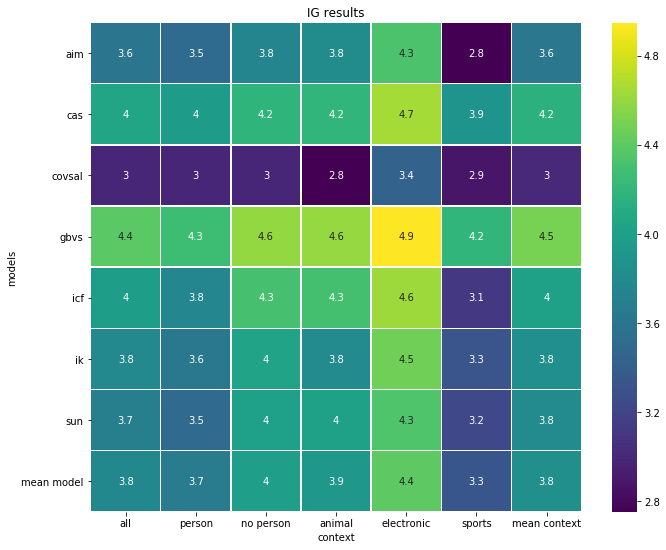

In [36]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(IG, annot=True, linewidths=.5, ax=ax, cmap='viridis');
plt.title('IG results');
# plt.savefig('plots/IG_all_with_mean.jpg', bbox_inches='tight', pad_inches=0)

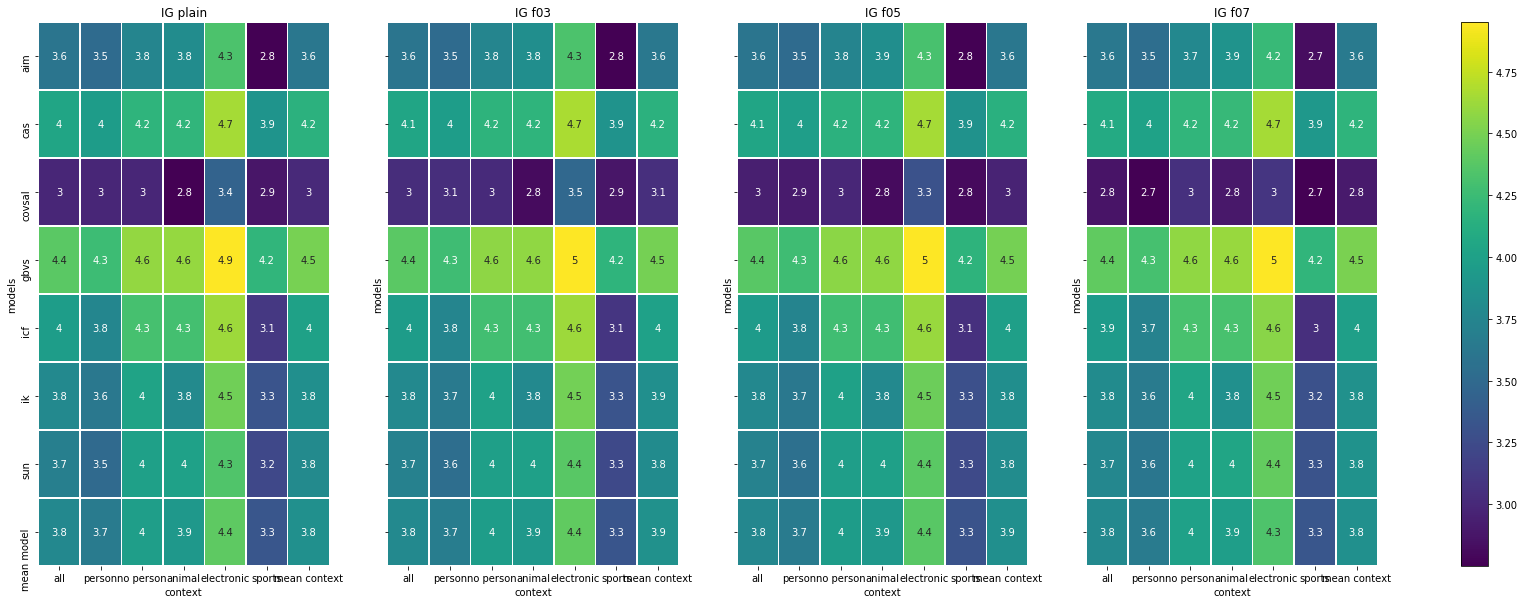

In [37]:
fig, ax = plt.subplots(1, 4,figsize=(30, 10), sharex=True, sharey=True)

im = sns.heatmap(IG, annot=True, linewidths=.5, ax=ax[0], cmap='viridis', cbar=False);
sns.heatmap(IG_f03, annot=True, linewidths=.5, ax=ax[1], cmap='viridis', cbar=False);
sns.heatmap(IG_f05, annot=True, linewidths=.5, ax=ax[2], cmap='viridis', cbar=False);
sns.heatmap(IG_f07, annot=True, linewidths=.5, ax=ax[3], cmap='viridis', cbar=False);

mappable = im.get_children()[0]
# plt.colorbar(mappable, ax = ax,orientation = 'horizontal')
plt.colorbar(mappable, ax = ax);

ax[0].set_title('IG plain');
ax[1].set_title('IG f03');
ax[2].set_title('IG f05');
ax[3].set_title('IG f07');
plt.savefig('plots/IG_sep_with_mean.jpg', bbox_inches='tight', pad_inches=0)

## Vizualization of means

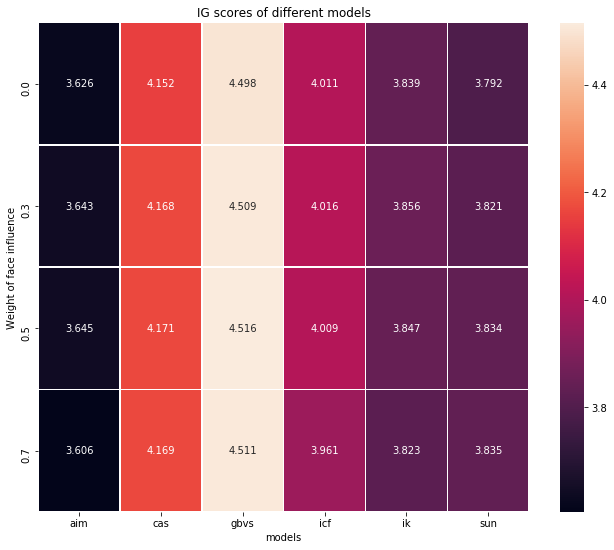

In [38]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(mean_contexts.transpose(), annot=True, linewidths=.5, ax=ax, fmt='.3f');

plt.title('IG scores of different models');
plt.ylabel('Weight of face influence')

plt.savefig('plots/IG_performance_mean_contexts.jpg', bbox_inches='tight', pad_inches=0)

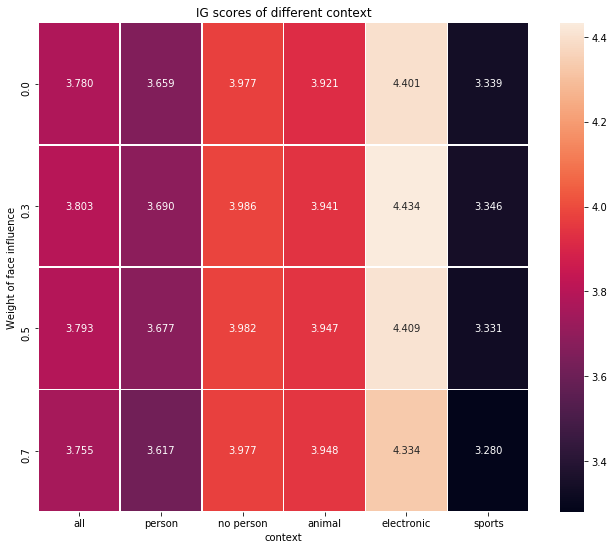

In [39]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(mean_models.transpose(), annot=True, linewidths=.5, ax=ax, fmt='.3f');
plt.title('IG scores of different context');
plt.ylabel('Weight of face influence')

plt.savefig('plots/IG_performance_mean_model.jpg', bbox_inches='tight', pad_inches=0)

## Calculate the relative error

In [40]:
IG0 = IG.loc[['aim','cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun', 'mean model']]

In [41]:
IG_diff_f03 = ((IG_f03 - IG0) / IG0)*100
IG_diff_f05 = ((IG_f05 - IG0) / IG0)*100
IG_diff_f07 = ((IG_f07 - IG0) / IG0)*100

#### Get mean of models and mean of contexts in diff out

In [42]:
mean_model_diff_f03 = IG_diff_f03.loc['mean model']
mean_model_diff_f05 = IG_diff_f05.loc['mean model']
mean_model_diff_f07 = IG_diff_f07.loc['mean model']

mean_models_diff = pd.DataFrame([mean_model_diff_f03, 
                            mean_model_diff_f05,
                            mean_model_diff_f07], index=[0.3,0.5,0.7])

mean_models_diff = mean_models_diff.transpose()
mean_models_diff

,0.3,0.5,0.7
context,,,
all,0.597217,0.341737,-0.680246
person,0.846963,0.494111,-1.131533
no person,0.227267,0.114505,-0.007250
animal,0.515503,0.668896,0.697616
electronic,0.741946,0.183943,-1.517789
sports,0.229183,-0.233683,-1.756090
mean context,0.533527,0.268972,-0.717098


In [43]:
mean_context_diff_f03 = IG_diff_f03.transpose().loc['mean context']
mean_context_diff_f05 = IG_diff_f05.transpose().loc['mean context']
mean_context_diff_f07 = IG_diff_f07.transpose().loc['mean context']

mean_context_diff = pd.DataFrame([mean_context_diff_f03, 
                            mean_context_diff_f05,
                            mean_context_diff_f07], index=[0.3,0.5,0.7])

mean_context_diff = mean_context_diff.transpose()
mean_context_diff

,0.3,0.5,0.7
models,,,
aim,0.469525,0.513058,-0.556140
cas,0.386055,0.439912,0.400489
covsal,1.592998,-1.017586,-5.994400
gbvs,0.235468,0.386883,0.286392
icf,0.121396,-0.038408,-1.244027
ik,0.459945,0.212287,-0.417719
sun,0.780414,1.110785,1.152077
mean model,0.533527,0.268972,-0.717098


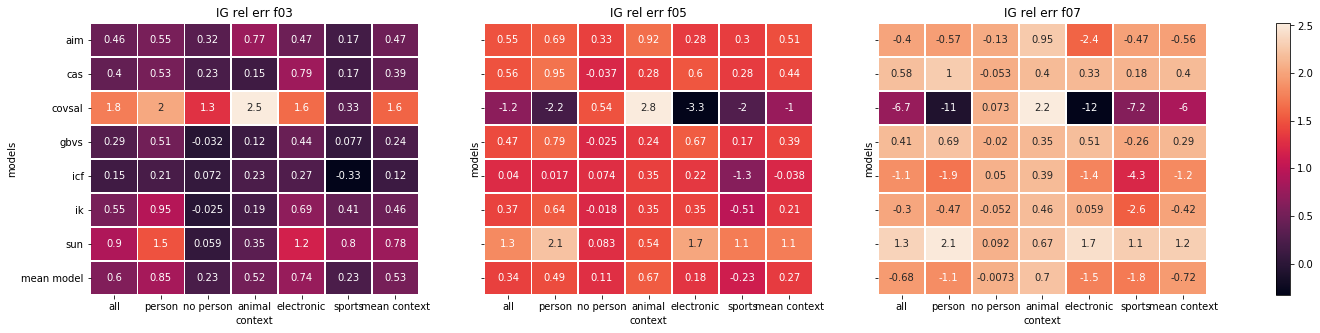

In [44]:
fig, ax = plt.subplots(1, 3,figsize=(25,5), sharex=True, sharey=True)

im = sns.heatmap(IG_diff_f03, annot=True, linewidths=.5, ax=ax[0], cbar=False);
sns.heatmap(IG_diff_f05, annot=True, linewidths=.5, ax=ax[1], cbar=False);
sns.heatmap(IG_diff_f07, annot=True, linewidths=.5, ax=ax[2], cbar=False);

mappable = im.get_children()[0]
plt.colorbar(mappable, ax = ax);

ax[0].set_title('IG rel err f03');
ax[1].set_title('IG rel err f05');
ax[2].set_title('IG rel err f07');
# plt.savefig('plots/ig_rel_err_with_mean.jpg', bbox_inches='tight', pad_inches=0)

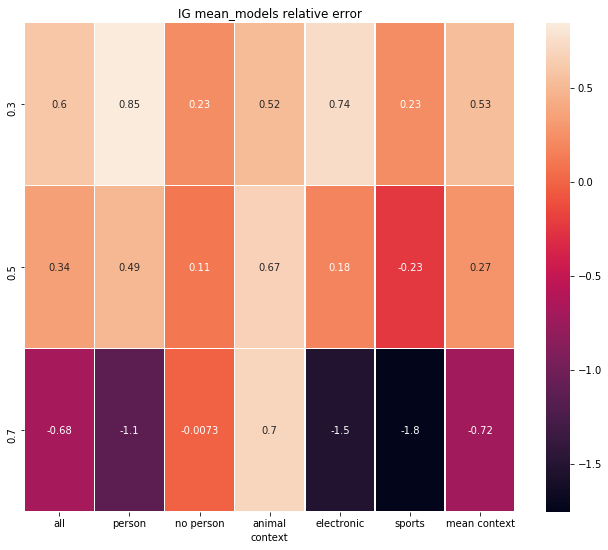

In [45]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(mean_models_diff.transpose(), annot=True, linewidths=.5, ax=ax);
plt.title('IG mean_models relative error');
# plt.savefig('plots/IG_mean_models_diff.jpg', bbox_inches='tight', pad_inches=0)

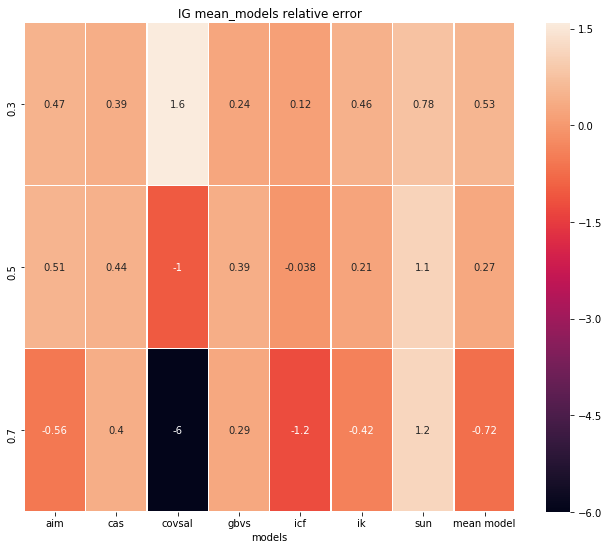

In [46]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(mean_context_diff.transpose(), annot=True, linewidths=.5, ax=ax);
plt.title('IG mean_models relative error');
# plt.savefig('plots/IG_mean_contexts_diff.jpg', bbox_inches='tight', pad_inches=0)

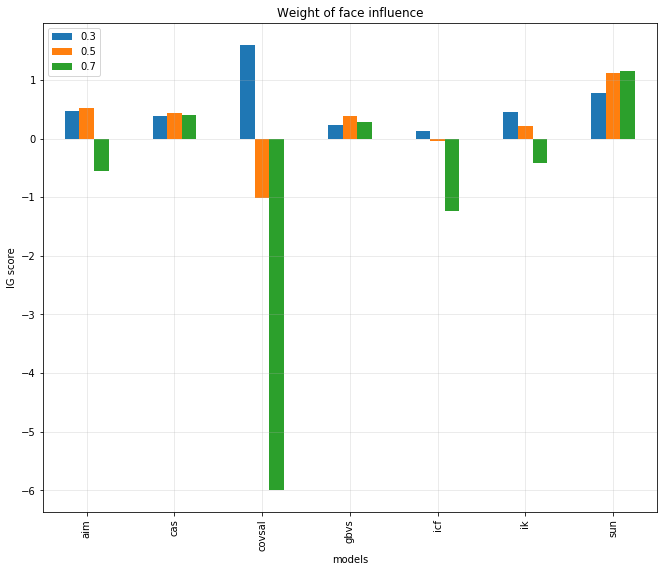

In [47]:
mean_context_diff = mean_context_diff.loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']]

fig, ax = plt.subplots(figsize=(11,9));
mean_context_diff.plot.bar(ax=ax);

plt.grid(alpha=0.3)
plt.title('Weight of face influence')
plt.ylabel('IG score');

plt.savefig('plots/IG_improvment_mean_contexts.jpg', bbox_inches='tight', pad_inches=0)

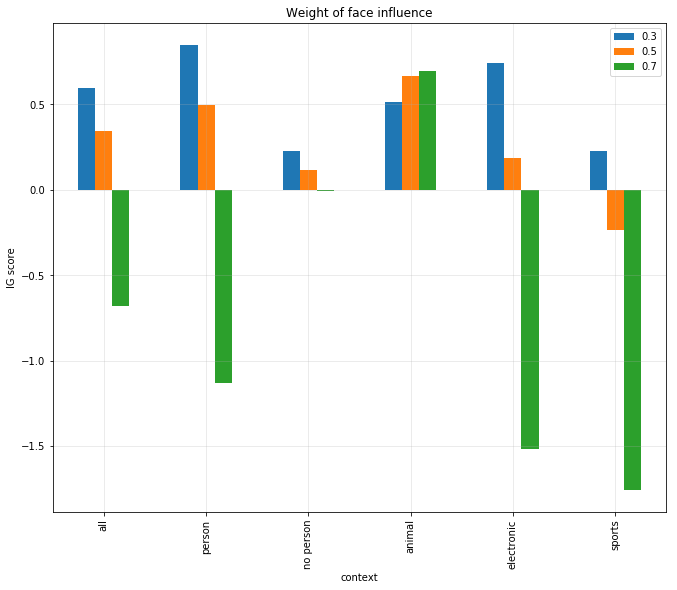

In [48]:
mean_models_diff = mean_models_diff.loc[['all', 'person', 'no person', 'animal', 'electronic', 'sports']]

fig, ax = plt.subplots(figsize=(11, 9));
mean_models_diff.plot.bar(ax=ax);

plt.grid(alpha=0.3)
plt.title('Weight of face influence')
plt.ylabel('IG score');

plt.savefig('plots/IG_improvment_mean_model.jpg', bbox_inches='tight', pad_inches=0)

In [49]:
mean_models

,0.0,0.3,0.5,0.7
context,,,,
all,3.780218,3.802794,3.793137,3.754503
person,3.658747,3.689735,3.676825,3.617347
no person,3.977129,3.986168,3.981683,3.976841
animal,3.920887,3.941100,3.947114,3.948240
electronic,4.401279,4.433934,4.409375,4.334477
sports,3.338836,3.346488,3.331033,3.280203


### IG vs baseline of faces

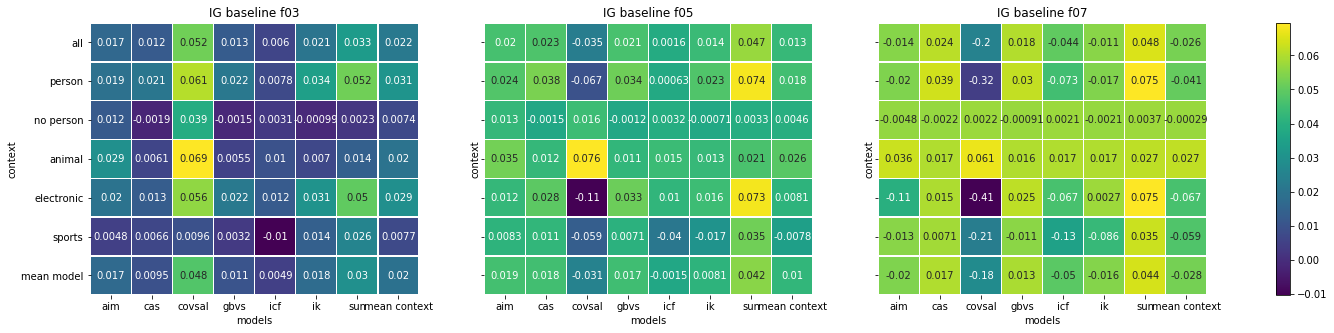

In [50]:
fig, ax = plt.subplots(1, 3,figsize=(25,5), sharex=True, sharey=True)

im = sns.heatmap(IG_ob_f03, annot=True, linewidths=.5, ax=ax[0], cmap='viridis', cbar=False);
sns.heatmap(IG_ob_f05, annot=True, linewidths=.5, ax=ax[1], cmap='viridis', cbar=False);
sns.heatmap(IG_ob_f07, annot=True, linewidths=.5, ax=ax[2], cmap='viridis', cbar=False);

mappable = im.get_children()[0]
plt.colorbar(mappable, ax = ax);

ax[0].set_title('IG baseline f03');
ax[1].set_title('IG baseline f05');
ax[2].set_title('IG baseline f07');
plt.savefig('plots/IG_baseline_with_mean.jpg', bbox_inches='tight', pad_inches=0)

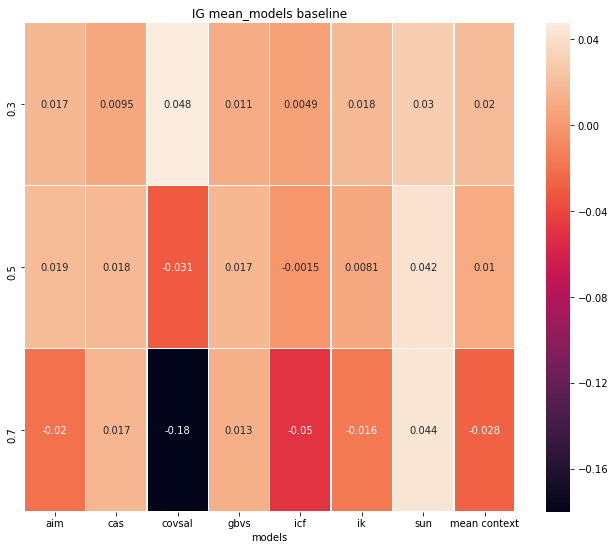

In [51]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(mean_models_ob.transpose(), annot=True, linewidths=.5, ax=ax);
plt.title('IG mean_models baseline');
# plt.savefig('plots/IG_mean_models_vs_baseline.jpg', bbox_inches='tight', pad_inches=0)

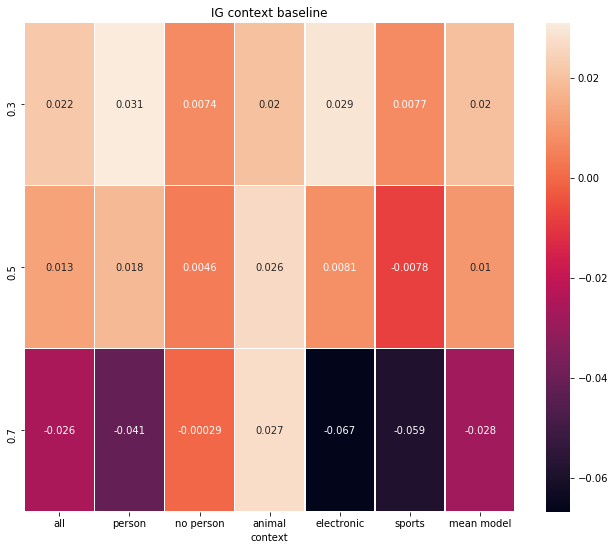

In [52]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(mean_context_ob.transpose(), annot=True, linewidths=.5, ax=ax);
plt.title('IG context baseline');
# plt.savefig('plots/IG_mean_context_vs_baseline.jpg', bbox_inches='tight', pad_inches=0)

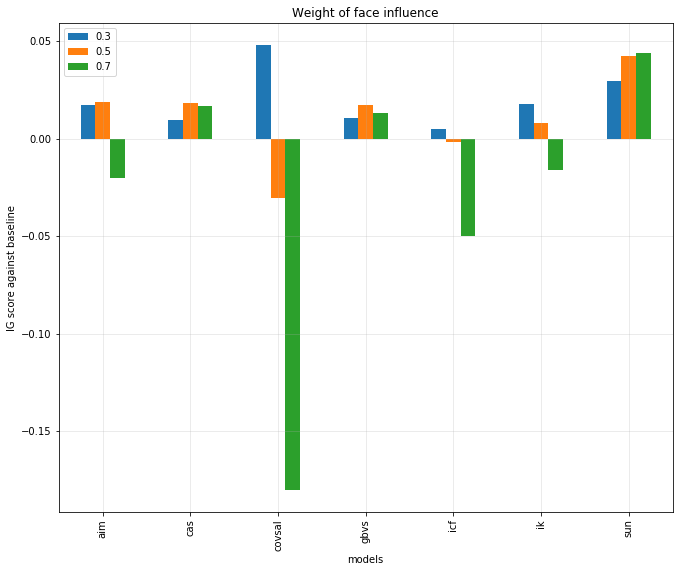

In [53]:
mean_models_ob = mean_models_ob.loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']]

fig, ax = plt.subplots(figsize=(11,9));
mean_models_ob.plot.bar(ax=ax);

plt.grid(alpha=0.3)
plt.title('Weight of face influence')
plt.ylabel('IG score against baseline');

plt.savefig('plots/IG_improvment_mean_contexts_BASELINE.jpg', bbox_inches='tight', pad_inches=0)

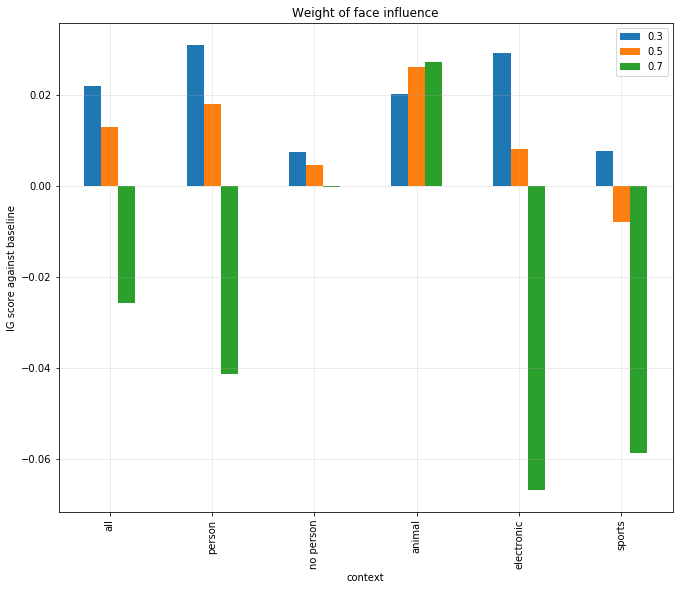

In [54]:
mean_context_ob = mean_context_ob.loc[['all', 'person', 'no person', 'animal', 'electronic', 'sports']]

fig, ax = plt.subplots(figsize=(11, 9));
mean_context_ob.plot.bar(ax=ax);

plt.grid(alpha=0.3)
plt.title('Weight of face influence')
plt.ylabel('IG score against baseline');

plt.savefig('plots/IG_improvment_mean_model_BASELINE.jpg', bbox_inches='tight', pad_inches=0)